In [1]:
# Aula 2 - Manipulação de base de dados

In [2]:
# Diretório de trabalho ---------------------------------------------------
setwd('~/')
setwd('Programming/R/Curso_R_PGPV/')

In [3]:
# Dados -------------------------------------------------------------------
ws = read.csv('WindSpeedData.csv', h=T)

In [4]:
# Processamentos ----------------------------------------------------------
# Olhando as datas iniciais e finais da base de dados
ws$Data[1]
ws$Data[length(ws$Data)]

[1] 01-JAN-2012
486 Levels: 01-ABR-2012 01-ABR-2013 01-AGO-2012 01-DEZ-2012 ... 31-OUT-2012

[1] 30-ABR-2013
486 Levels: 01-ABR-2012 01-ABR-2013 01-AGO-2012 01-DEZ-2012 ... 31-OUT-2012

In [5]:
# Criando sequência das datas
date.seq = seq(as.Date('2012-01-01'), as.Date('2013-04-30'), 'days')
date.seq = rep(date.seq, each=24)

In [6]:
# Criando sequência das horas
time.seq = 0:23
time.seq = rep(time.seq, length(ws$Data))

In [7]:
# Colocando dados em uma matrix
ws2 = as.matrix(ws[2:25])

In [8]:
# Transpor matrix e converter em vetor
ws3 = as.numeric(as.vector(t(ws2)))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [9]:
# Criando data frame com dados organizados
dfws = data.frame(date.seq, time.seq, ws3)
names(dfws) = c('Date', 'Hour', 'WindSpeed')

In [10]:
# Salvando dataframe organizado
write.csv(dfws, 'WindSpeed_organized.csv')

In [11]:
# Valores médios ----------------------------------------------------------
# Média diária
ws.day = tapply(dfws$WindSpeed, dfws$Date, mean, na.rm=T)

# Desvio padrão
ws.day.sd = tapply(dfws$WindSpeed, dfws$Date, sd, na.rm=T)

# Média horária
ws.hour = tapply(dfws$WindSpeed, dfws$Hour, mean, na.rm=T)

# Desvio padrão
ws.hour.sd = tapply(dfws$WindSpeed, dfws$Hour, sd, na.rm=T)

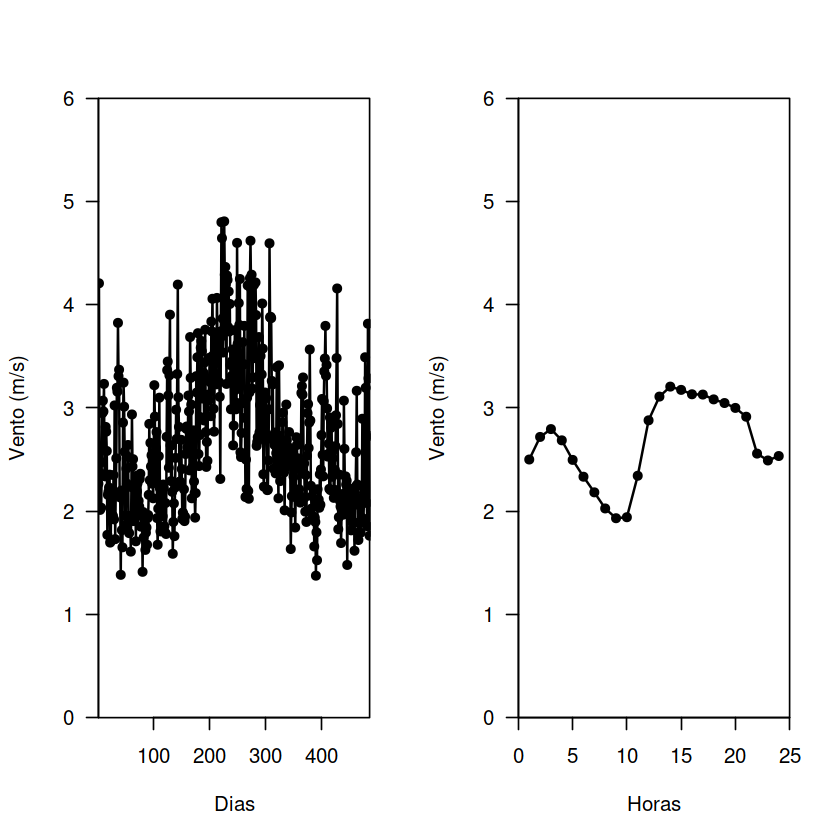

In [12]:
# Plotando os dados -------------------------------------------------------
par(mfrow=c(1,2), las=1, xaxs='i', yaxs='i', family='serif')

# Velocidade do vento diária
plot(ws.day, type='o', lwd=1.5, pch=16, ylim=c(0,6),
     xlab='Dias', ylab='Vento (m/s)')

# Velocidade do vento horária
plot(ws.hour, type='o', lwd=1.5, pch=16, xlim=c(0,25), ylim=c(0,6),
     xlab='Horas', ylab='Vento (m/s)')

In [13]:
# Fazendo um gráfico um pouco mais elaborado
par(mfrow=c(2,1), las=1, xaxs='i', yaxs='i', family='serif')

# Velocidade do vento diária +- desvio padrão
plot(ws.day, type='n', xlim=c(0,487),ylim=c(0,6),
     xlab='Dias', ylab='Vento (m/s)')

xx = c(1:486, 486:1)
yy = c(ws.day+ws.day.sd, rev(ws.day-ws.day.sd))
polygon(xx, yy, border=F, col='lightblue')

lines(ws.day, lwd=1.2, col='blue')
points(ws.day, pch=16, cex=0.5, col='blue')

# Velocidade do vento horária +- desvio padrão
plot(ws.hour, type='n', xlim=c(0,25),ylim=c(0,6),
     xlab='Hora', ylab='Vento (m/s)')

xx = c(1:24, 24:1)
yy = c(ws.hour+ws.hour.sd, rev(ws.hour-ws.hour.sd))
polygon(xx, yy, border=F, col='lightblue')

lines(ws.hour, lwd=1.2, col='blue')
points(ws.hour, pch=16, cex=0.7, col='blue')
